## Project 3 - due Friday, 12/9 at 12pm
### Group members
* Qinhui Xu
* Ying Zhang
* Zezhi Zhou
* Zian Wang

Work in groups of four people per project.
Select a dataset of at least 250,000 records, preferably at the level of individual transactions. Acquire the
data, survey it, wrangle it into a suitable format, and analyze it. Present your work in a brief (8-10 minute)
talk in class on Tuesday, 12/6, and write up your process and results in a reproducible notebook.
You may use any of the methods we studied in class: Unix command line tools, relational databases and
dimensional models with SQLite or PostgreSQL, or Spark. The datanotebook.org server will remain available
until the end of the semester and may be used for the project.
Attestation: All project team members should contribute meaningfully to the final results. Please attest to
your individual contributions and that each member contributed substantially to the project in your final
writeup.
Deadline: Friday, 12/9, 12pm. Submit your presentation (PDF export), your notebook, and any additionally
necessary files like scripts or images together in one zip file. Only one team member should submit on behalf
of all members. All team members should post their projects to GitHub for reviews after the deadline has
passed.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Part 1 - Selection (30 points)
Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and
perform an initial exploration to determine which themes you wish to explore. Describe the questions you
want to be able to answer with the data, any concerns you have about the data, and any challenges you
expect to have to overcome.

** Download the Request Service data from website. **

The data is about the 311 Service Request in Austin. There are 388387 transactions in total.


In [10]:
!wget "https://data.austintexas.gov/api/views/i26j-ai4z/rows.csv?accessType=DOWNLOAD"

--2016-12-03 05:40:20--  https://data.austintexas.gov/api/views/i26j-ai4z/rows.csv?accessType=DOWNLOAD
Resolving data.austintexas.gov (data.austintexas.gov)... 52.206.68.26
Connecting to data.austintexas.gov (data.austintexas.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [    <=>               ] 125.97M  3.45MB/s   in 38s    

Last-modified header invalid -- time-stamp ignored.
2016-12-03 05:40:58 (3.34 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [132093850]



** Rename the csv file. **

In [11]:
!mv rows.csv?accessType=DOWNLOAD ServiceRequest.csv

** Explore the Data. **

In [3]:
!wc -l ServiceRequest.csv

  388407 ServiceRequest.csv


In [4]:
!csvcut -n ServiceRequest.csv

  1: Service Request (SR) Number
  2: SR Type Code
  3: SR Description
  4: Owning Department
  5: Method Received
  6: SR Status
  7: Status Change Date
  8: Created Date
  9: Last Update Date
 10: Close Date
 11: SR Location
 12: Street Number
 13: Street Name
 14: City
 15: Zip Code
 16: County
 17: State Plane X Coordinate
 18: State Plane Y Coordinate
 19: Latitude Coordinate
 20: Longitude Coordinate
 21: (Latitude.Longitude)
 22: Council District
 23: Map Page
 24: Map Tile


** Let's have a look about the first 5 rows of the data to get an overview. **

In [5]:
!head -5 ServiceRequest.csv|csvcut -c1,2,3,4| csvlook
!head -5 ServiceRequest.csv|csvcut -c5,6,7,8| csvlook
!head -5 ServiceRequest.csv|csvcut -c9,10,11,12| csvlook
!head -5 ServiceRequest.csv|csvcut -c13,14,15,16| csvlook
!head -5 ServiceRequest.csv|csvcut -c17,18,19| csvlook
!head -5 ServiceRequest.csv|csvcut -c20,21,22| csvlook
!head -5 ServiceRequest.csv|csvcut -c23,24| csvlook

|------------------------------+--------------+------------------------------+--------------------|
|  Service Request (SR) Number | SR Type Code | SR Description               | Owning Department  |
|------------------------------+--------------+------------------------------+--------------------|
|  16-00107769                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|  16-00108244                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|  16-00108269                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|  16-00108062                 | TRASIGMA     | Traffic Signal - Maintenance | Transportation     |
|------------------------------+--------------+------------------------------+--------------------|
|------------------+--------------------+------------------------+-------------------------|
|  Method Received | SR Status          | Status Change Date     | Created Date            |
|-------------

** Chcek the basic statistic information about the file. **

In [6]:
!csvstat ServiceRequest.csv

  1. Service Request (SR) Number
	<class 'str'>
	Nulls: True
	Unique values: 384169
	Max length: 11
  2. SR Type Code
	<class 'str'>
	Nulls: True
	Unique values: 120
	5 most frequent values:
		CODECOMP:	63837
		ACLONAG:	26670
		TRASIGMA:	24014
		ACINFORM:	17708
		SWSRECYC:	17452
	Max length: 8
  3. SR Description
	<class 'str'>
	Nulls: True
	Unique values: 133
	5 most frequent values:
		Austin Code - Request Code Officer:	63837
		Loose Dog:	26670
		Traffic Signal - Maintenance:	24014
		Animal Control - Assistance Request:	17708
		ARR Missed Recycling:	17452
	Max length: 51
  4. Owning Department
	<class 'str'>
	Nulls: True
	Unique values: 15
	5 most frequent values:
		Animal Services Office:	81497
		Transportation:	67553
		Austin Code Department:	66592
		Austin Resource Recovery:	53938
		Public Works:	36809
	Max length: 44
  5. Method Received
	<class 'str'>
	Nulls: True
	Unique values: 18
	5 most frequent values:
		Phone:	331680
		Spot311 Interface:	22643
		Web:	20677
		Mass Entry:	65

** Check if there is null value **

In [7]:
import pandas as pd
SRdf = pd.read_csv("ServiceRequest.csv")
SRdf.head()

/Users/apple1/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Service Request (SR) Number,SR Type Code,SR Description,Owning Department,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Close Date,...,Zip Code,County,State Plane X Coordinate,State Plane Y Coordinate,Latitude Coordinate,Longitude Coordinate,(Latitude.Longitude),Council District,Map Page,Map Tile
0,16-00107769,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),05/06/2016 12:11:57 PM,05/06/2016 12:01:46 PM,05/06/2016 12:11:57 PM,05/06/2016 12:11:57 PM,...,78703.0,TRAVIS,3.10604e+06,1.008098e+07,30.296699,-97.768264,"(30.29669887, -97.76826374)",10.0,584C,MH24
1,16-00108244,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),05/06/2016 07:51:27 PM,05/06/2016 07:51:27 PM,05/06/2016 07:51:27 PM,05/06/2016 07:51:27 PM,...,78745.0,TRAVIS,3.09624e+06,1.005019e+07,30.212695,-97.801521,"(30.2126949, -97.8015215)",5.0,643M,MF17
2,16-00108269,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),05/06/2016 08:22:56 PM,05/06/2016 08:22:56 PM,05/06/2016 08:22:56 PM,05/06/2016 08:22:56 PM,...,78745.0,TRAVIS,3.09624e+06,1.005019e+07,30.212695,-97.801521,"(30.2126949, -97.8015215)",5.0,643M,MF17
3,16-00108062,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),05/10/2016 04:56:52 PM,05/06/2016 05:03:45 PM,05/10/2016 04:56:52 PM,05/10/2016 04:56:52 PM,...,78759.0,TRAVIS,3.10586e+06,1.011309e+07,30.384989,-97.766471,"(30.38498865, -97.76647071)",10.0,494L,MH32
4,16-00107654,STREETL2,Street Light Issue- Address,Austin Energy Department,Phone,Closed,05/10/2016 06:58:01 AM,05/06/2016 10:28:16 AM,05/10/2016 06:58:01 AM,05/10/2016 06:58:01 AM,...,78703.0,TRAVIS,3.11149e+06,1.007070e+07,30.268090,-97.751739,"(30.26808964, -97.75173887)",9.0,584V,MH22


In [8]:
SRdf.isnull().sum()

Service Request (SR) Number     4234
SR Type Code                    4235
SR Description                  4235
Owning Department               4235
Method Received                 4235
SR Status                       4235
Status Change Date              4235
Created Date                    4235
Last Update Date                4235
Close Date                     21566
SR Location                     7317
Street Number                  81613
Street Name                     7396
City                            7846
Zip Code                        7769
County                          9306
State Plane X Coordinate        7378
State Plane Y Coordinate        7421
Latitude Coordinate             7391
Longitude Coordinate            7391
(Latitude.Longitude)            7391
Council District               25916
Map Page                        7799
Map Tile                        8567
dtype: int64

In [9]:
dfNull= _


In [10]:
NullNum = pd.DataFrame(dfNull,columns=['Number'])
NullNum.reset_index(level=0,inplace=True)


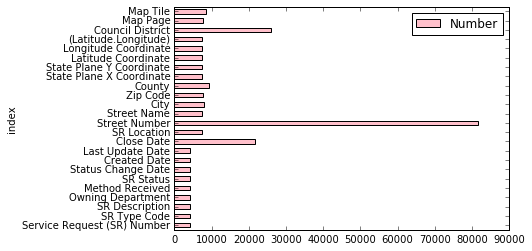

In [13]:
%matplotlib inline
NullNum.plot.barh(x='index',y='Number',color='pink')

*** So, we can see that there are NULL values in all the columns. We will deal with NULL values in our next setp.***

Since the data is about Service Request, the first thing we want to know is:
    
   *  Which department received most Service Requests?

We will use Spart to deal with such a big amount of data and to answer this question.

** Use Spark to Explore Data **

In [14]:
from pyspark.sql.types import *
import pyspark.sql.functions as F

In [15]:
page_views_schema = StructType(
                    [StructField("SRID", StringType(), True),
                    StructField("SRTypeCode", StringType(), True),
                    StructField("SRdes", StringType(), True),
                    StructField("OwningDepart", StringType(), True),
                    StructField("MethodReceived", StringType(), True),
                    StructField("SRStatus", StringType(), True),
                    StructField("ChangeDate", StringType(), True),
                    StructField("CreateDate", StringType(), True),
                    StructField("LastUpdateDate", StringType(), True),
                    StructField("CloseDate", StringType(), True),
                    StructField("SRLoc", StringType(), True),
                    StructField("StreetNum", StringType(), True),
                    StructField("StreetName", StringType(), True),
                    StructField("City", StringType(), True),
                    StructField("ZipCode", StringType(), True),
                    StructField("County", StringType(), True),
                    StructField("StatePlaneX", StringType(), True),
                    StructField("StatePlaneY", StringType(), True),
                    StructField("Latitude", StringType(), True),
                    StructField("Longitude", StringType(), True),
                    StructField("Geocode", StringType(), True),
                    StructField("Council", StringType(), True),
                    StructField("MapPage", StringType(), True),
                    StructField("MapTitle", StringType(), True)]
                    )
#Data is read from Google Cloud Storage, a distributed filesystem like HDFS stored externally to the cluster
#If you wanna use your own HDFS, just prefix the file path with the absolute path 'hdfs:' or 
#with the relative path if HDFS is your cluster default filesystem
page_views_df = spark.read.schema(page_views_schema).options(header='true', inferschema='false', nullValue='\\N') \
                .csv("ServiceRequest.csv")

In [16]:
%time page_views_df.show()

+-----------+----------+--------------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+------+-------+------+----------------+----------------+-----------+------------+--------------------+-------+-------+--------+
|       SRID|SRTypeCode|               SRdes|        OwningDepart|   MethodReceived|          SRStatus|          ChangeDate|          CreateDate|      LastUpdateDate|           CloseDate|               SRLoc|StreetNum|          StreetName|  City|ZipCode|County|     StatePlaneX|     StatePlaneY|   Latitude|   Longitude|             Geocode|Council|MapPage|MapTitle|
+-----------+----------+--------------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+------+-------+------+-----

In [17]:
%time page_views_by_owningDepart_pandas = page_views_df.groupBy('OwningDepart').count().toPandas()

CPU times: user 7.26 ms, sys: 5.67 ms, total: 12.9 ms
Wall time: 2.82 s


In [18]:
page_views_by_owningDepart_pandas = page_views_by_owningDepart_pandas.set_index('count').sort_index(ascending=False)
page_views_by_owningDepart_pandas.reset_index(level=0,inplace=True)

In [19]:
OwningDepart = page_views_by_owningDepart_pandas
OwningDepart

,count,OwningDepart
0,81497,Animal Services Office
1,67553,Transportation
2,66592,Austin Code Department
3,53938,Austin Resource Recovery
4,36809,Public Works
5,17075,Austin Energy Department
6,14799,Health & Human Services
7,14563,Parks & Recreation Department
8,11657,Austin Water Utility
9,11291,Economic Development Department


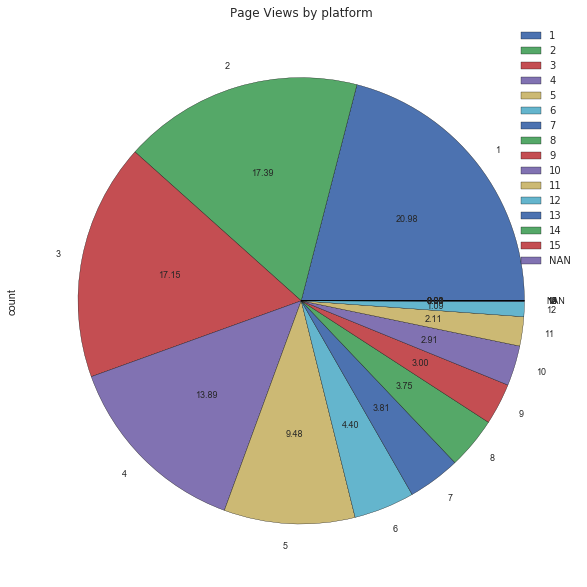

In [20]:
import seaborn as sns
%matplotlib inline
page_views_by_owningDepart_pandas.plot.pie(y='count', figsize=(10, 10), labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','NAN'], 
              title='Page Views by platform', autopct='%.2f', fontsize=9)

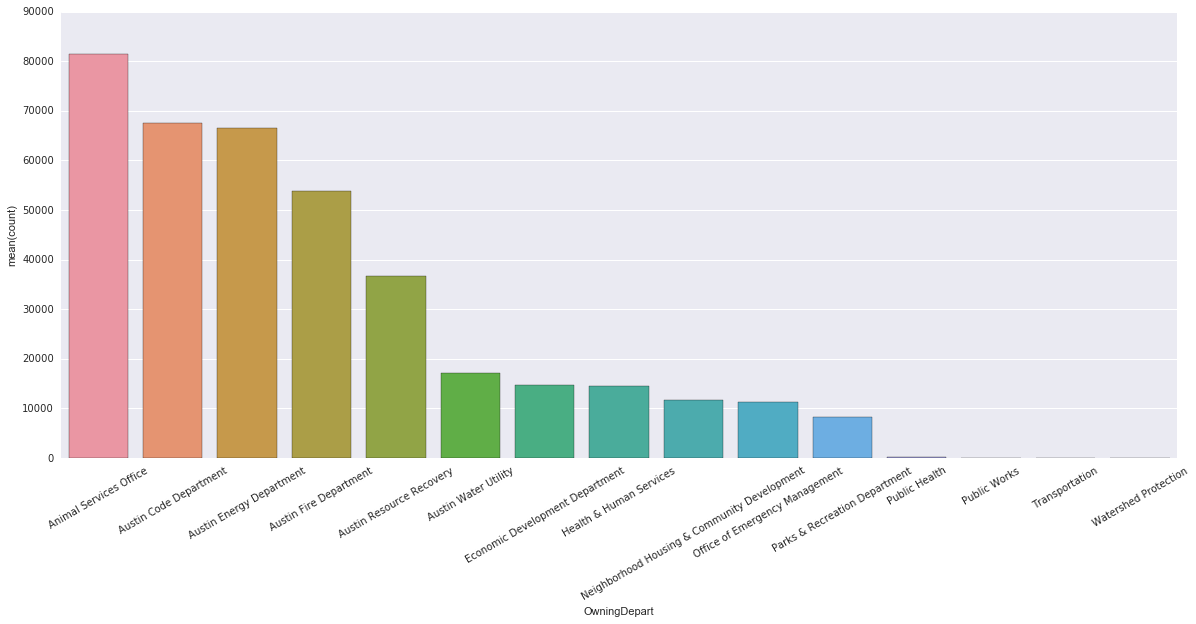

In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('figure', figsize=(20, 8))
splt = sns.barplot(x='OwningDepart', y='count', data=OwningDepart)
labels=['Animal Services Office', 'Austin Code Department', 'Austin Energy Department',\
        'Austin Fire Department','Austin Resource Recovery','Austin Water Utility','Economic Development Department',\
        'Health & Human Services','Neighborhood Housing & Community Development','Office of Emergency Management',\
        'Parks & Recreation Department','Public Health','Public Works','Transportation','Watershed Protection','NAN']
splt.set_xticklabels(labels, rotation=30)

From the histogram we can learn that Animal Services Office received most service requests. 

Also, we can see that Parks & Recreation Department, Public Health, Public Works, Transportation and Watershed Protection
received least service requests. 

Now, a new question raised:
* Why the result is different from our expectation that department like Transportation would receive more 
  service requests? What are the main causes of this result?

Besides, we also want to explore what is the distribution of all these service requests in Austin and how long would a department react to the request?

To answer these questions, we need to explore the data in different aspects.

** First, we build a map to have an initial exploration of the data for the distribution issue. **

In [ ]:
import plotly as py
py.tools.set_credentials_file(username='zzyy2361669', api_key='U4js9YvyZajjXb1q1g4n')
import plotly.plotly as py
import plotly.tools as plotly_tools
from plotly.graph_objs import *
py.sign_in("zzyy2361669", "U4js9YvyZajjXb1q1g4n")
import pandas as pd

In [ ]:
Dep_List = ["Animal Services Office","Transportation", "Austin Code Department", "Austin Resource Recovery",\
           "Public Works", "Austin Energy Department","Health & Human Services","Parks & Recreation Department",\
           "Austin Water Utility","Economic Development Department","Watershed Protection",\
            "Neighborhood Housing & Community Development","Austin Fire Department","Office of Emergency Management"]
Color_List = ["#FF8C69","#FFE4E1","#FFEC8B","#D1EEEE","#AEEEEE","#B4EEB4","#5CACEE","#8470FF","#43CD80","#CD8500",\
             "#FF4500","#FFC1C1","#B3B3B3","#8FBC8F"]

df = pd.read_csv('ServiceRequest.csv')
df = df.sample(frac=0.005 )   # randomly select 2000 rows in dataframe

df['text'] = df['SR Type Code'] + '<br>' + df['SR Description'] + '<br>' + df['Owning Department']

#mapbox_access_token = 'pk.eyJ1IjoiY2hlbHNlYXBsb3RseSIsImEiOiJjaXFqeXVzdDkwMHFrZnRtOGtlMGtwcGs4In0.SLidkdBMEap9POJGIe1eGw'
mapbox_access_token = "pk.eyJ1IjoienkyMzYxNjY5IiwiYSI6ImNpdzhtb3NreTAyZ3Eyem1oNGFoaGNzcjUifQ.0KdVns1zQyjGXUvn2Ab_jw"

dat = []
for i in range(len(Dep_List)):
    df_sub = df[(df["Owning Department"]==Dep_List[i])]  
    x = df_sub['Latitude Coordinate'].tolist()
    y = df_sub['Longitude Coordinate'].tolist()
    
    d = Scattermapbox(
            lat=x,
            lon=y,
            mode='markers',
            marker=Marker(
                size=6, color=Color_List[i] 
            ),
        text = [n for n in df_sub['text']],
        name = Dep_List[i])
    dat.append(d)
    
data = Data(dat)      

layout = Layout(
    autosize=True,
    width=860,
    height=600,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=30.3,
            lon=-97.8
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Service Requests', validate=False)

From the map, we can see that some of the requests are concentrated while requests for Animal Service Office are scattered.

Using the map, we can have a direct exploration of all the data. Each point can show its department and service request description.

#### Which columns interest you the most?

From the initial data exploration, the columns interest us most are SRTypeCode, SRdescription, Owning Department, Create Date, Close Date and Geocode

** -----End of Data Exploration------ **

** Use Spark to Explore Data. **

In [ ]:
from operator import add
RS = sc.textFile('ServiceRequest.csv')
RS.count()


In [ ]:
SR_Type_Code = RS \
    .map(lambda r: r.split(",")) \
    .map(lambda r: ((r[1], r[2]), 1))
key_func = lambda k, v: -v
SR_Type_Code_counts = SR_Type_Code \
    .reduceByKey(add) \
    .takeOrdered(100, key=lambda r: -r[1])
SR_Type_Code_counts

## Part 2 - Wrangling (35 points)


Based on what you found above, wrangle the data into a format suitable for analysis. This may involve
cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your
process as you proceed, and document any scripts, databases, or other models you develop. Be specific about
any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make
about the meaning of variables and their values.
Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional
model, ensure that the fact table contains the right number of records).

** Create and connect to database. **

In [12]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [13]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


The following cells create the database 'ServiceRequest' and make a connection to it.

In [14]:
!createdb -U dbuser ServiceRequest

createdb: database creation failed: ERROR:  database "ServiceRequest" already exists


In [15]:
%sql postgresql://dbuser@localhost/ServiceRequest

'Connected: dbuser@ServiceRequest'

** Create table. **

In [77]:
%%sql
DROP TABLE IF EXISTS  ServiceRequest;
CREATE TABLE  ServiceRequest
(
    SRID VARCHAR(16),
    SRTypeCode VARCHAR(16),
    SRdes VARCHAR(60),
    OwningDepart VARCHAR(60),
    MethodReceived VARCHAR(25),
    SRStatus VARCHAR(35),
    ChangeDate TIMESTAMP,
    CreateDate TIMESTAMP,
    LastUpdateDate TIMESTAMP,
    CloseDate TIMESTAMP,
    SRLoc VARCHAR(160),
    StreetNum VARCHAR(8),
    StreetName VARCHAR(100),
    City VARCHAR(18),
    ZipCode VARCHAR(8),
    County VARCHAR(16),
    StatePlaneX CHAR(40),
    StatePlaneY VARCHAR(40),
    Latitude VARCHAR(40),
    Longitude VARCHAR(40),
    Geocode VARCHAR(60),
    Council VARCHAR(8),
    MapPage VARCHAR(8),
    MapTitle VARCHAR(8)
)

Done.
Done.


[]

** Load the data. **

In [78]:
!pwd

/home/jovyan/work


In [79]:
%%sql
COPY ServiceRequest FROM '/home/jovyan/work/ServiceRequest.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

388403 rows affected.


[]

** Verify the loaded records. **

Below cell shows that the records number loaded to database is correct.

In [80]:
%%sql
SELECT COUNT(*) FROM ServiceRequest;

1 rows affected.


count
388403


** Deal with null value **

In [81]:
%%sql
DELETE FROM ServiceRequest WHERE SRID IS NULL;

4234 rows affected.


[]

In [82]:
%%sql
DROP TABLE IF EXISTS SR;
CREATE TABLE SR as (
SELECT
    SRID
    ,SRTypeCode
    , coalesce(SRdes,'n/a') as SRdes
    , coalesce(OwningDepart, 'n/a') as OwningDepart
    , coalesce(MethodReceived, 'n/a') as MethodReceived
    , coalesce(SRStatus, 'n/a') as SRStatus
    , coalesce(ChangeDate, '01/01/1900  00:00:00 AM') as ChangeDate
    , coalesce(CreateDate, '01/01/1900  00:00:00 AM') as CreateDate
    , coalesce(LastUpdateDate, '01/01/1900  00:00:00 AM') as LastUpdateDate
    , coalesce(CloseDate, '01/01/1900  00:00:00 AM') as CloseDate
    , coalesce(SRLoc, 'n/a') as SRLoc
    , coalesce(StreetNum, 'n/a') as StreetNum
    , coalesce(StreetName, 'n/a') as StreetName
    , coalesce(City, 'n/a') as City
    , coalesce(ZipCode, 'n/a') as ZipCode
    , coalesce(County, 'n/a') as County
    , coalesce(StatePlaneX, 'n/a') as StatePlaneX
    , coalesce(StatePlaneY, 'n/a') as StatePlaneY
    , coalesce(Latitude, '0') as Latitude
    , coalesce(Longitude, '0') as Longitude
    , coalesce(Geocode, '(0,0)') as Geocode
    , coalesce(Council, 'n/a') as Council
    , coalesce(MapPage, 'n/a') as MapPage
    , coalesce(MapTitle, 'n/a') as MapTitle
FROM ServiceRequest
);


Done.
384169 rows affected.


[]

Now, let's see the first 5 rows in the database.

In [83]:
%%sql
SELECT * FROM SR
LIMIT 5;

5 rows affected.


srid,srtypecode,srdes,owningdepart,methodreceived,srstatus,changedate,createdate,lastupdatedate,closedate,srloc,streetnum,streetname,city,zipcode,county,stateplanex,stateplaney,latitude,longitude,geocode,council,mappage,maptitle
16-00107769,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 12:11:57,2016-05-06 12:01:46,2016-05-06 12:11:57,2016-05-06 12:11:57,"WINDSOR RD & EXPOSITION BLVD, AUSTIN, TX 78703",n/a,WINDSOR RD & EXPOSITION BLVD,AUSTIN,78703,TRAVIS,3106038.49745799,10080978.0030157,30.29669887,-97.76826374,"(30.29669887, -97.76826374)",10,584C,MH24
16-00108244,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 19:51:27,2016-05-06 19:51:27,2016-05-06 19:51:27,2016-05-06 19:51:27,"6001 MANCHACA RD, AUSTIN, TX 78745",6001,MANCHACA,AUSTIN,78745,TRAVIS,3096240.5,10050194,30.2126949,-97.8015215,"(30.2126949, -97.8015215)",5,643M,MF17
16-00108269,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-06 20:22:56,2016-05-06 20:22:56,2016-05-06 20:22:56,2016-05-06 20:22:56,"6001 MANCHACA RD, AUSTIN, TX 78745",6001,MANCHACA,AUSTIN,78745,TRAVIS,3096240.5,10050194,30.2126949,-97.8015215,"(30.2126949, -97.8015215)",5,643M,MF17
16-00108062,TRASIGMA,Traffic Signal - Maintenance,Transportation,Phone,Duplicate (closed),2016-05-10 16:56:52,2016-05-06 17:03:45,2016-05-10 16:56:52,2016-05-10 16:56:52,"8401 N CAPITAL OF TEXAS HWY NB, AUSTIN, TX 78759",8401,CAPITAL OF TEXAS,AUSTIN,78759,TRAVIS,3105863.35797435,10113092.5341337,30.38498865,-97.76647071,"(30.38498865, -97.76647071)",10,494L,MH32
16-00107654,STREETL2,Street Light Issue- Address,Austin Energy Department,Phone,Closed,2016-05-10 06:58:01,2016-05-06 10:28:16,2016-05-10 06:58:01,2016-05-10 06:58:01,"300 WEST AVE, AUSTIN, TX 78703",300,WEST,AUSTIN,78703,TRAVIS,3111493.73999999,10070696.54,30.26808964,-97.75173887,"(30.26808964, -97.75173887)",9,584V,MH22


## Check the one to one relationship

Using the below code to find whether SR Type code and SR Description have a 1-to-1 relationship.
* Function checkdependency check if two columns are dependent (bijection)

In [63]:
%%sql
CREATE OR REPLACE FUNCTION checkdependency(text,text) RETURNS text AS $$
DECLARE
    result text; 
    c1 text;
    c2 text;
    r1 boolean;
    r2 boolean;
BEGIN
    c1 := $1;
    c2 := $2;
    EXECUTE 'SELECT count(*)=0 FROM ( SELECT '|| c1 ||' FROM ( SELECT distinct('|| c1 ||'),'||c2||' FROM SR )t1 GROUP BY '|| c1 ||' HAVING count(*)>1)t2'
        INTO r1;
    EXECUTE 'SELECT count(*)=0 FROM ( SELECT '|| c2 ||' FROM ( SELECT distinct('|| c2 ||'),'||c1||' FROM SR )t1 GROUP BY '|| c2 ||' HAVING count(*)>1)t2'
        INTO r2;
    SELECT r1 AND r2 INTO result;
    RETURN result;
END
$$ LANGUAGE plpgsql;

Done.


[]

In [64]:
%%sql 
SELECT checkdependency('SRTypeCode','SRdes');

1 rows affected.


checkdependency
false


### Create the Service Request Type Dimension table

In [25]:
%%sql
DROP TABLE IF EXISTS SRType;
CREATE TABLE SRType
(
    SRType_key serial,
    SRType_Code VARCHAR(16),
    SRType_Des VARCHAR(60),
    PRIMARY KEY (SRType_key)
)

Done.
Done.


[]

In [26]:
%%sql
INSERT INTO SRType (SRType_Code, SRType_Des)
SELECT DISTINCT SRTypeCode, SRdes
FROM ServiceRequest;

135 rows affected.


[]

In [27]:
%%sql
SELECT *
FROM SRType
LIMIT 10;

10 rows affected.


srtype_key,srtype_code,srtype_des
1,None,None
2,PRCEMET1,Park Maintenance - Cemeteries
3,SWSDUMPS,ARR Dumpster
4,DRFLOODG,Flooding Current (Non-Emergency)
5,DRSSPIPE,Standing Water
6,AWUHYDRA,Water Theft Report
7,SBRSR,Road Sanding Request
8,SIGNPARK,Sign - Parking Sign Maintenance
9,PRMTPOOL,Park Maintenance - Pool Issues
10,RESTBREA,Austin Code - Construction Ordinance SR


### Create the Department Dimension table

In [28]:
%%sql
DROP TABLE IF EXISTS Department;
CREATE TABLE Department
(
    Dept_key serial,
    Department_Name VARCHAR(60),
    PRIMARY KEY (Dept_key)
)

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO Department (Department_Name)
SELECT DISTINCT OwningPart
FROM SR;

16 rows affected.


[]

In [30]:
%%sql
SELECT *
FROM Department
LIMIT 5;

5 rows affected.


dept_key,department_name
1,Public Health
2,Animal Services Office
3,Economic Development Department
4,n/a
5,Austin Water Utility


### Create the Method Dimension table

In [31]:
%%sql
DROP TABLE IF EXISTS Method;
CREATE TABLE Method
(
    Method_key serial,
    Method_Received VARCHAR(25),
    PRIMARY KEY (Method_key)
)

Done.
Done.


[]

In [32]:
%%sql
INSERT INTO Method (Method_Received)
SELECT DISTINCT MethodReceived
FROM ServiceRequest;

19 rows affected.


[]

In [33]:
%%sql
SELECT *
FROM Method
LIMIT 5;

5 rows affected.


method_key,method_received
1,None
2,Mobile Devi
3,Mass Entry
4,CSR - Follow On SR
5,Web


### Create the Status Dimension table

In [34]:
%%sql
DROP TABLE IF EXISTS Status;
CREATE TABLE Status
(
    Status_key serial,
    SR_Status VARCHAR(35),
    PRIMARY KEY (Status_key)
)

Done.
Done.


[]

In [35]:
%%sql
INSERT INTO Status (SR_Status)
SELECT DISTINCT SRStatus
FROM SR;

15 rows affected.


[]

In [36]:
%%sql
SELECT *
FROM Status
LIMIT 5;

5 rows affected.


status_key,sr_status
1,Closed -Incomplete Information
2,Work In Progress
3,n/a
4,Open
5,Resolved


### Create the Location Dimension table

In [37]:
%%sql
DROP TABLE IF EXISTS Location;
CREATE TABLE Location
(
    Location_key serial,
    SR_Location VARCHAR(160),
    Street_Name VARCHAR(100),
    City VARCHAR(18),
    ZipCode VARCHAR(8),
    County VARCHAR(16),
    Latitude VARCHAR(40),
    Longitude VARCHAR(40),
    District VARCHAR(8),
    PRIMARY KEY (Location_key)
)

Done.
Done.


[]

In [38]:
%%sql
INSERT INTO Location (SR_Location,Street_Name,City,ZipCode,County,Latitude,Longitude,District)
SELECT DISTINCT 
    SRLoc,
    StreetName,
    City,
    ZipCode,
    County,
    Latitude,
    Longitude,
    Council
FROM SR;

193537 rows affected.


[]

In [39]:
%%sql
SELECT *
FROM Location
LIMIT 10;

10 rows affected.


location_key,sr_location,street_name,city,zipcode,county,latitude,longitude,district
1,*METER TX,*Meter,n/a,n/a,n/a,0,0,n/a
2,"0 BASTROP HWY NB, AUSTIN, TX",BASTROP HWY,AUSTIN,78725,TRAVIS,30.24562909,-97.69029776,3
3,"0 E US 290 HWY EB, AUSTIN, TX",290,AUSTIN,78724,TRAVIS,30.32544739,-97.67157404,1
4,"0 MANOR TO ED BLUESTEIN NB RAMP, AUSTIN, TX 78724",MANOR TO ED BLUESTEIN NB,AUSTIN,78724,TRAVIS,30.31712713,-97.66271067,n/a
5,"0 N SH 130 NB, AUSTIN, TX",130,AUSTIN,78653,TRAVIS,30.30933259,-97.57004581,1
6,"0 RESEARCH BLVD SVRD NB, AUSTIN, TX 78758",RESEARCH BLVD SVRD,AUSTIN,78758,TRAVIS,30.37313223,-97.72566097,7
7,"0 SERVICE RD N/A N/A N/A, AUSTIN, TX 78758",SERVICE,AUSTIN,78719,TRAVIS,30.20670769,-97.67299638,2
8,"0 TRAIL DRIVER, DRIPPING SPRINGS, TX 78736",TRAIL DRIVER,DRIPPING SPRINGS,78737,HAYS,30.23233167,-98.00503823,n/a
9,0328 TX,n/a,n/a,n/a,n/a,0,0,n/a
10,"1 APPLEGREEN CT, THE HILLS, TX 78738",APPLEGREEN,THE HILLS,78738,TRAVIS,30.34294091,-97.9936555,n/a


### Create the 'Create Case Time' Dimension table

In [40]:
%%sql
DROP TABLE IF EXISTS CreateCaseTime;
CREATE TABLE CreateCaseTime (
    Create_Date_Key SERIAL,
    CreateCase_time TIMESTAMP,
    CreateCase_date CHAR(10),
    CreateCase_hour INTEGER,
    CreateCase_day INTEGER,
    CreateCase_month INTEGER,
    CreateCase_quarter INTEGER,
    CreateCase_year INTEGER,
    Create_day_of_week_str CHAR(9),
    Create_day_of_week INTEGER,
    CreateCase_is_weekend BOOLEAN,
    CreateCase_is_weekday BOOLEAN,
    PRIMARY KEY (Create_Date_Key)
);

Done.
Done.


[]

In [41]:
%%sql
INSERT INTO CreateCaseTime (CreateCase_time,CreateCase_date,CreateCase_year,CreateCase_month,CreateCase_day, CreateCase_hour,CreateCase_quarter,
    Create_day_of_week_str,Create_day_of_week,CreateCase_is_weekend,CreateCase_is_weekday)
SELECT DISTINCT CreateDate AS CreateCase_time,
    TO_CHAR(CreateDate, 'YYYY-MM-DD') AS CreateCase_date, 
    CAST(TO_CHAR(CreateDate, 'YYYY') AS INTEGER) AS CreateCase_year,
    CAST(TO_CHAR(CreateDate, 'MM') AS INTEGER) AS CreateCase_month,
    CAST(TO_CHAR(CreateDate, 'DD') AS INTEGER) AS CreateCase_day,
    CAST(TO_CHAR(CreateDate, 'HH24') AS INTEGER) AS CreateCase_hour,
    CAST(TO_CHAR(CreateDate, 'Q') AS INTEGER) AS CreateCase_quarter,
    TO_CHAR(CreateDate, 'Day') AS Create_day_of_week_str,
    CAST(TO_CHAR(CreateDate, 'D') AS INTEGER) AS Create_day_of_week,
    CASE WHEN CAST(TO_CHAR(CreateDate, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS CreateCase_is_weekend,
    CASE WHEN CAST(TO_CHAR(CreateDate, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS CreateCase_is_weekday
FROM SR;

375298 rows affected.


[]

In [42]:
%%sql
ALTER TABLE CreateCaseTime DROP COLUMN createcase_time;

Done.


[]

In [43]:
%%sql
SELECT *
FROM CreateCaseTime
LIMIT 10;

10 rows affected.


create_date_key,createcase_date,createcase_hour,createcase_day,createcase_month,createcase_quarter,createcase_year,create_day_of_week_str,create_day_of_week,createcase_is_weekend,createcase_is_weekday
1,2015-09-10,8,10,9,3,2015,Thursday,5,False,True
2,2016-08-13,12,13,8,3,2016,Saturday,7,True,False
3,2014-02-28,8,28,2,1,2014,Friday,6,False,True
4,2015-11-28,17,28,11,4,2015,Saturday,7,True,False
5,2016-03-09,11,9,3,1,2016,Wednesday,4,False,True
6,2015-04-16,13,16,4,2,2015,Thursday,5,False,True
7,2016-09-09,14,9,9,3,2016,Friday,6,False,True
8,2015-04-23,10,23,4,2,2015,Thursday,5,False,True
9,2015-05-30,10,30,5,2,2015,Saturday,7,True,False
10,2015-02-04,9,4,2,1,2015,Wednesday,4,False,True


### Create the 'Close Case Time' Dimension table

In [44]:
%%sql
DROP TABLE IF EXISTS CloseCaseTime;
CREATE TABLE CloseCaseTime (
    Close_Date_Key SERIAL,
    CloseCase_time TIMESTAMP,
    CloseCase_date CHAR(10),
    CloseCase_hour INTEGER,
    CloseCase_day INTEGER,
    CloseCase_month INTEGER,
    CloseCase_quarter INTEGER,
    CloseCase_year INTEGER,
    Close_day_of_week_str CHAR(9),
    Close_day_of_week INTEGER,
    CloseCase_is_weekend BOOLEAN,
    CloseCase_is_weekday BOOLEAN,
    PRIMARY KEY (Close_Date_Key)
);

Done.
Done.


[]

In [45]:
%%sql
INSERT INTO CloseCaseTime (CloseCase_time,CloseCase_date, CloseCase_hour,CloseCase_day,CloseCase_month,CloseCase_quarter,CloseCase_year,
    Close_day_of_week_str,Close_day_of_week,CloseCase_is_weekend,CloseCase_is_weekday)
SELECT DISTINCT CloseDate AS CloseCase_time,
    TO_CHAR(CloseDate, 'YYYY-MM-DD') AS CloseCase_date, 
    CAST(TO_CHAR(CloseDate, 'YYYY') AS INTEGER) AS CloseCase_year,
    CAST(TO_CHAR(CloseDate, 'MM') AS INTEGER) AS CloseCase_month,
    CAST(TO_CHAR(CloseDate, 'DD') AS INTEGER) AS CloseCase_date,
    CAST(TO_CHAR(CloseDate, 'HH24') AS INTEGER) AS CloseCase_hour,
    CAST(TO_CHAR(CloseDate, 'Q') AS INTEGER) AS CloseCase_quarter,
    TO_CHAR(CloseDate, 'Day') AS Close_day_of_week_str,
    CAST(TO_CHAR(CloseDate, 'D') AS INTEGER) AS Close_day_of_week,
    CASE WHEN CAST(TO_CHAR(CloseDate, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS CloseCase_is_weekend,
    CASE WHEN CAST(TO_CHAR(CloseDate, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS CloseCase_is_weekday
FROM SR;

338171 rows affected.


[]

In [46]:
%%sql
ALTER TABLE CloseCaseTime DROP COLUMN Closecase_time;

Done.


[]

In [47]:
%%sql
SELECT *
FROM CloseCaseTime
LIMIT 10;

10 rows affected.


close_date_key,closecase_date,closecase_hour,closecase_day,closecase_month,closecase_quarter,closecase_year,close_day_of_week_str,close_day_of_week,closecase_is_weekend,closecase_is_weekday
1,2016-04-21,2016,4,21,11,2,Thursday,5,False,True
2,2016-05-10,2016,5,10,13,2,Tuesday,3,False,True
3,2016-08-22,2016,8,22,6,3,Monday,2,False,True
4,2015-05-04,2015,5,4,9,2,Monday,2,False,True
5,2014-04-24,2014,4,24,17,2,Thursday,5,False,True
6,2016-06-01,2016,6,1,16,2,Wednesday,4,False,True
7,2014-02-04,2014,2,4,18,1,Tuesday,3,False,True
8,2015-10-12,2015,10,12,18,4,Monday,2,False,True
9,2016-05-09,2016,5,9,14,2,Monday,2,False,True
10,2016-07-25,2016,7,25,20,3,Monday,2,False,True


## Build the Fact Table

In [57]:
%%sql
DROP TABLE IF EXISTS Fact;
CREATE TABLE Fact
(
    SRID VARCHAR(16) not null,
    SRType_key integer,
    Dept_key integer,
    Method_key integer,
    Status_key integer,
    Location_key integer,
    Create_Date_key integer,
    Close_Date_key integer

)

Done.
Done.


[]

In [58]:
%%sql
select *
from Fact
limit 10

0 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key


In [66]:
%%sql
INSERT INTO Fact (SRID)
SELECT SRID
FROM SR;

384169 rows affected.


[]

In [67]:
%%sql
select *
from Fact
limit 10

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key
16-00107769,None,None,None,None,None,None,None
16-00108244,None,None,None,None,None,None,None
16-00108269,None,None,None,None,None,None,None
16-00108062,None,None,None,None,None,None,None
16-00107654,None,None,None,None,None,None,None
16-00107641,None,None,None,None,None,None,None
16-00107655,None,None,None,None,None,None,None
16-00107684,None,None,None,None,None,None,None
16-00107711,None,None,None,None,None,None,None
16-00275028,None,None,None,None,None,None,None


** Insert SRType_key from SRType. **

In [71]:
%%sql
UPDATE 
  Fact T1 
SET
  SRType_key = T2.SRType_key
FROM SRType T2
  INNER JOIN SR T3 ON T2.SRType_Code = T3.SRTypeCode AND T2.SRType_Des = T3.SRdes
WHERE 
  T1.SRID = T3.SRID
;

384168 rows affected.


[]

In [74]:
%%sql
select *
from Fact
limit 10

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key
16-00108062,71,None,None,None,None,None,None
16-00107641,53,None,None,None,None,None,None
16-00275028,115,None,None,None,None,None,None
16-00108004,71,None,None,None,None,None,None
16-00108027,71,None,None,None,None,None,None
16-00107494,53,None,None,None,None,None,None
16-00107433,71,None,None,None,None,None,None
16-00107845,71,None,None,None,None,None,None
16-00107934,71,None,None,None,None,None,None
16-00107471,22,None,None,None,None,None,None


** Insert Dept_key from Department. **

In [84]:
%%sql
UPDATE 
  Fact T1 
SET
  Dept_key = T2.Dept_key
FROM Department T2
  INNER JOIN SR T3 ON T2.Department_Name = T3.OwningDepart
WHERE 
  T1.SRID = T3.SRID
;

384169 rows affected.


[]

In [85]:
%%sql
select *
from Fact
limit 10

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key
14-00076578,51,10,None,None,None,None,None
14-00076346,51,10,None,None,None,None,None
14-00076452,51,10,None,None,None,None,None
14-00079727,60,15,None,None,None,None,None
14-00076319,103,9,None,None,None,None,None
14-00079644,103,9,None,None,None,None,None
14-00076395,124,14,None,None,None,None,None
14-00079576,106,2,None,None,None,None,None
14-00079602,103,9,None,None,None,None,None
14-00079588,103,9,None,None,None,None,None


** Insert Method_key from Method. **

In [87]:
%%sql
UPDATE 
  Fact T1 
SET
  Method_key = T2.Method_key
FROM Method T2
  INNER JOIN SR T3 ON T2.Method_Received = T3.MethodReceived
WHERE 
  T1.SRID = T3.SRID
;

384168 rows affected.


[]

In [88]:
%%sql
select *
from Fact
limit 10

10 rows affected.


srid,srtype_key,dept_key,method_key,status_key,location_key,create_date_key,close_date_key
16-00108062,71,15,17,None,None,None,None
16-00275028,115,10,17,None,None,None,None
16-00108004,71,15,17,None,None,None,None
16-00107845,71,15,17,None,None,None,None
16-00107934,71,15,17,None,None,None,None
16-00106209,51,10,17,None,None,None,None
14-00248674,106,2,17,None,None,None,None
14-00250395,106,2,17,None,None,None,None
14-00217954,106,2,17,None,None,None,None
14-00218221,106,2,17,None,None,None,None


** Insert Status_key from Status. **

In [89]:
%%sql
UPDATE 
  Fact T1 
SET
  Status_key = T2.Status_key
FROM Status T2
  INNER JOIN SR T3 ON T2.SR_Status = T3.SRStatus
WHERE 
  T1.SRID = T3.SRID
;

384169 rows affected.


[]

** Insert Location_key from Location. **

In [93]:
%%sql
UPDATE 
  Fact T1 
SET
  Location_key = T2.Location_key
FROM Location T2
  INNER JOIN SR T3 ON T2.SR_Location = T3.SRLoc AND T2.Street_Name = T3.StreetName AND T2.City = T3.City AND T2.Zipcode = T3.Zipcode AND T2.County = T3.County AND T2.Latitude = T3.Latitude AND T2.Longitude = T3.Longitude AND T2.District = T3.Council
WHERE 
  T1.SRID = T3.SRID
;

384169 rows affected.


[]

**Insert Create_Date_Key from Create Case Time. **

In [ ]:
%%sql
UPDATE 
  Fact T1 
SET
  Create_Date_Key = T2.Create_Date_Key
FROM CreateCaseTime T2
  INNER JOIN SR T3 ON T2.SR_Location = T3.SRLoc AND T2.Street_Name = T3.StreetName AND T2.City = T3.City AND T2.Zipcode = T3.Zipcode AND T2.County = T3.County AND T2.Latitude = T3.Latitude AND T2.Longitude = T3.Longitude AND T2.District = T3.Council
WHERE 
  T1.SRID = T3.SRID
;

## Part 3 - Analysis (35 points)

Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1
with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover,
discussing them and whether the results match your expectations. Include charts or other visuals that support
your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but
be sure to export images and to include them properly in your writeup.

** Below is the link to our Star Schema diagram.**

https://www.processon.com/view/link/5825245de4b0fa6ffb9a7584

In [ ]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/zhianwang/istm-6212/master/Project-02/Pjt2_Star%20Schema%20diagram.JPG", width=800, height=800)

### Create the Service Request Type Dimension table